## Лабораторная 3. Линейная регрессия

### Задание

 - Выбор датасетов:
   - Студенты с нечетным порядковым номером в группе должны использовать про обучение студентов
 1. Получите и визуализируйте (графически) статистику по датасету (включая количество, среднее значение, стандартное отклонение, минимум, максимум и различные квантили).
 2. Проведите предварительную обработку данных, включая обработку отсутствующих значений, кодирование категориальных признаков и нормировка.
 3. Разделите данные на обучающий и тестовый наборы данных.
 4. Реализуйте линейную регрессию с использованием метода наименьших квадратов без использования сторонних библиотек, кроме NumPy и Pandas (для использования коэффициентов использовать библиотеки тоже нельзя). Использовать минимизацию суммы квадратов разностей между фактическими и предсказанными значениями для нахождения оптимальных коэффициентов.
 5. Постройте три модели с различными наборами признаков. Для каждой модели проведите оценку производительности, используя метрику коэффициент детерминации, чтобы измерить, насколько хорошо модель соответствует данным.
 6. Сравните результаты трех моделей и сделайте выводы о том, какие признаки работают лучше всего для каждой модели.
 - Бонусное задание: Ввести синтетический признак при построении модели

### Решение
Импортируем необходимые библиотеки

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### 1. Получите и визуализируйте (графически) статистику по датасету (включая количество, среднее значение, стандартное отклонение, минимум, максимум и различные квантили).
Считываем данные

In [2]:
file_path = './archive/student_performance.csv'
data = pd.read_csv(file_path)
data.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


Визуализируем статистику

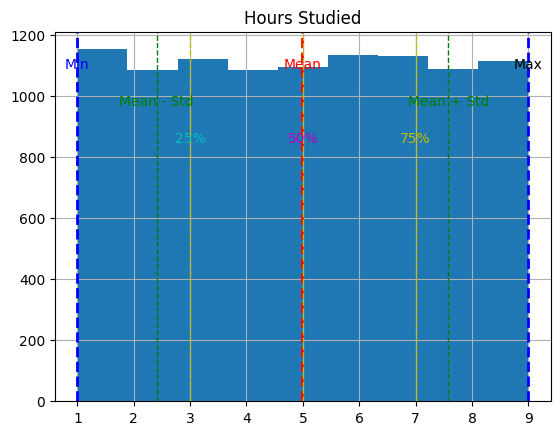

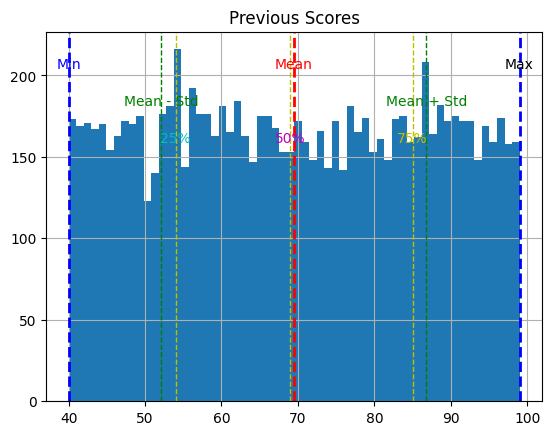

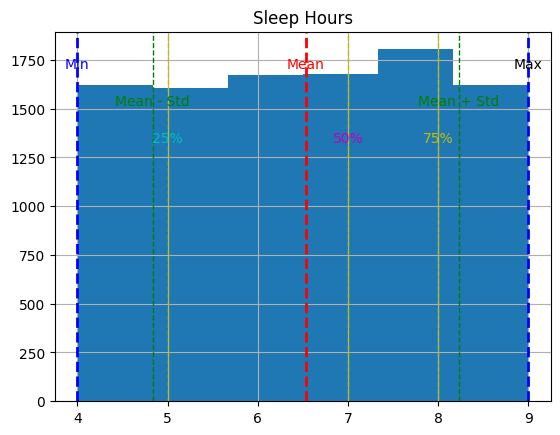

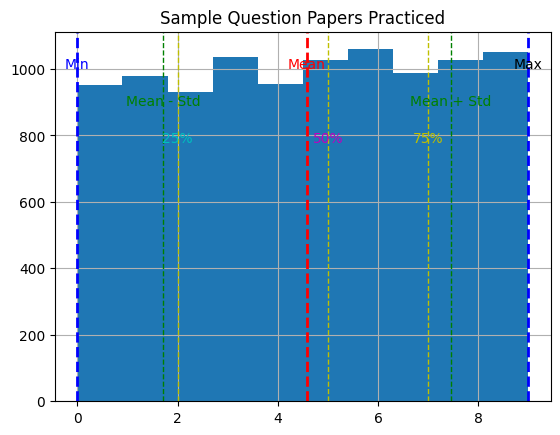

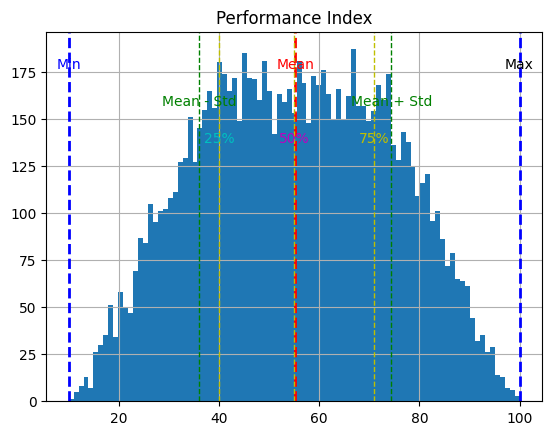

In [3]:
desc = data.describe()

for col in data.columns:
    if col == 'Extracurricular Activities':
        continue
    plt.figure()
    data[col].hist(bins=len(data[col].unique()))
    
    mean = desc[col]['mean']
    std = desc[col]['std']
    min_val = desc[col]['min']
    q25 = desc[col]['25%']
    median = desc[col]['50%']
    q75 = desc[col]['75%']
    max_val = desc[col]['max']
    
    plt.axvline(mean, color='r', linestyle='dashed', linewidth=2)
    plt.text(mean, plt.ylim()[1]*0.9, 'Mean', color='r', ha='center')
    
    plt.axvline(mean + std, color='g', linestyle='dashed', linewidth=1)
    plt.text(mean + std, plt.ylim()[1]*0.8, 'Mean + Std', color='g', ha='center')
    
    plt.axvline(mean - std, color='g', linestyle='dashed', linewidth=1)
    plt.text(mean - std, plt.ylim()[1]*0.8, 'Mean - Std', color='g', ha='center')
    
    plt.axvline(min_val, color='b', linestyle='dashed', linewidth=2)
    plt.text(min_val, plt.ylim()[1]*0.9, 'Min', color='b', ha='center')
    
    plt.axvline(q25, color='y', linestyle='dashed', linewidth=1)
    plt.text(q25, plt.ylim()[1]*0.7, '25%', color='c', ha='center')
    
    plt.axvline(median, color='y', linestyle='dashed', linewidth=1)
    plt.text(median, plt.ylim()[1]*0.7, '50%', color='m', ha='center')
    
    plt.axvline(q75, color='y', linestyle='dashed', linewidth=1)
    plt.text(q75, plt.ylim()[1]*0.7, '75%', color='y', ha='center')
    
    plt.axvline(max_val, color='b', linestyle='dashed', linewidth=2)
    plt.text(max_val, plt.ylim()[1]*0.9, 'Max', color='k', ha='center')
    
    plt.title(col)
    plt.show()

### 2. Проведите предварительную обработку данных, включая обработку отсутствующих значений, кодирование категориальных признаков и нормировка.

Удаляем строки с пропущенными значениями

In [4]:
missing_values = data.isnull().sum()
print("Missing values per column:")
print(missing_values)
rows_to_delete = data.isnull().any(axis=1).sum()
data = data.dropna()
print("Deleted rows:", rows_to_delete)

Missing values per column:
Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64
Deleted rows: 0


Кодируем категориальные признаки

In [5]:
data['Extracurricular Activities'] = data['Extracurricular Activities'].map({'Yes': 1, 'No': 0})
data

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,1,4,2,23.0
9996,7,64,1,8,5,58.0
9997,6,83,1,8,5,74.0
9998,9,97,1,7,0,95.0


Нормируем данные

In [6]:
data = (data - data.mean()) / data.std()
data

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,0.775149,1.704090,1.010404,1.456132,-1.249691,1.862074
1,-0.383461,0.723876,-0.989604,-1.492220,-0.900937,0.508792
2,1.161352,-1.063573,1.010404,0.276791,-0.900937,-0.532194
3,0.002742,-1.005913,1.010404,-0.902549,-0.900937,-1.000637
4,0.775149,0.320259,-0.989604,0.866462,0.145326,0.560842
...,...,...,...,...,...,...
9995,-1.542072,-1.178892,1.010404,-1.492220,-0.900937,-1.677278
9996,0.775149,-0.313997,1.010404,0.866462,0.145326,0.144447
9997,0.388945,0.781536,1.010404,0.866462,0.145326,0.977236
9998,1.547556,1.588771,1.010404,0.276791,-1.598446,2.070271


In [7]:
data.describe()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04
mean,9.805490e-17,-1.247003e-16,1.776357e-17,1.612932e-16,-1.357137e-16,-9.734435e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.542072e+00,-1.697829e+00,-9.896040e-01,-1.492220e+00,-1.598446e+00,-2.353919e+00
25%,-7.696649e-01,-8.905936e-01,-9.896040e-01,-9.025493e-01,-9.009371e-01,-7.924400e-01
50%,2.742045e-03,-2.569890e-02,-9.896040e-01,2.767912e-01,1.453259e-01,-1.170068e-02
75%,7.751490e-01,8.968554e-01,1.010404e+00,8.664615e-01,8.428346e-01,8.210880e-01
max,1.547556e+00,1.704090e+00,1.010404e+00,1.456132e+00,1.540343e+00,2.330517e+00


### 3. Разделите данные на обучающий и тестовый наборы данных.

Данные делятся в пропорции 80% на обучающую выборку и 20% на тестовую

In [8]:
X = data[['Hours Studied', 'Previous Scores', 'Extracurricular Activities', 'Sleep Hours',
          'Sample Question Papers Practiced']].values
y = data['Performance Index'].values

# Add a column of ones to X for the intercept term (bias)
X = np.concatenate([np.ones((X.shape[0], 1)), X], axis=1)

train_size = int(0.8 * X.shape[0])
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8000, 6), (2000, 6), (8000,), (2000,))

### 4. Реализуйте линейную регрессию с использованием метода наименьших квадратов без использования сторонних библиотек, кроме NumPy и Pandas (для использования коэффициентов использовать библиотеки тоже нельзя). Использовать минимизацию суммы квадратов разностей между фактическими и предсказанными значениями для нахождения оптимальных коэффициентов.

Реализуем функцию для градиентного спуска

In [9]:
def gradient_descent(X, y, theta, learning_rate=0.01, num_iterations=1000):
    assert X.shape[0] == y.shape[0], "X and y must have the same number of rows"
    assert X.shape[1] == theta.shape[0], "X and theta must have the same number of columns"
    print(f"Training {num_iterations} iterations with learning rate {learning_rate}")
    m = len(y)
    for i in range(num_iterations):
        predictions = X.dot(theta)
        gradients = (1 / m) * X.T.dot(predictions - y)
        theta = theta - learning_rate * gradients
        
        if i % 100 == 0 or i == num_iterations - 1:
            cost = (1 / (2 * m)) * np.sum((predictions - y) ** 2)
            print(f"Iteration {i}: Cost {cost}")
            
    print(f"Training complete.")
    return theta

# Initialize theta (all zeros)
theta = np.zeros(X_train.shape[1])
theta = gradient_descent(X_train, y_train, theta)

theta

Training 1000 iterations with learning rate 0.01
Iteration 0: Cost 0.5012525323570195
Iteration 100: Cost 0.07250165481554842
Iteration 200: Cost 0.014642394352336344
Iteration 300: Cost 0.0068184674457541835
Iteration 400: Cost 0.005758330655834117
Iteration 500: Cost 0.005614390506903165
Iteration 600: Cost 0.005594807508577631
Iteration 700: Cost 0.0055921379186112145
Iteration 800: Cost 0.005591773277351132
Iteration 900: Cost 0.005591723374236819
Iteration 999: Cost 0.0055917165536208645
Training complete.


array([-7.55284202e-04,  3.84277776e-01,  9.18927033e-01,  1.64315010e-02,
        4.18599748e-02,  2.85694790e-02])

### 5. Постройте три модели с различными наборами признаков. Для каждой модели проведите оценку производительности, используя метрику коэффициент детерминации, чтобы измерить, насколько хорошо модель соответствует данным.

Функция для вычисления коэффициента детерминации

In [10]:
def r_squared(y_true, y_pred):
    assert len(y_true) == len(y_pred), "y_true and y_pred must have the same length"
    mean_y = np.mean(y_true)
    ss_tot = np.sum((y_true - mean_y) ** 2) # Объяснённая дисперсия
    ss_res = np.sum((y_true - y_pred) ** 2) # Необъяснённая дисперсия
    r2 = 1 - (ss_res / ss_tot)
    return r2

Модель 1: все признаки

In [11]:
X_train_model1 = X_train
X_test_model1 = X_test
theta_model1 = np.zeros(X_train_model1.shape[1])
theta_model1 = gradient_descent(X_train_model1, y_train, theta_model1)
y_pred_model1 = X_test_model1.dot(theta_model1)
r2_model1 = r_squared(y_test, y_pred_model1)
r2_model1

Training 1000 iterations with learning rate 0.01
Iteration 0: Cost 0.5012525323570195
Iteration 100: Cost 0.07250165481554842
Iteration 200: Cost 0.014642394352336344
Iteration 300: Cost 0.0068184674457541835
Iteration 400: Cost 0.005758330655834117
Iteration 500: Cost 0.005614390506903165
Iteration 600: Cost 0.005594807508577631
Iteration 700: Cost 0.0055921379186112145
Iteration 800: Cost 0.005591773277351132
Iteration 900: Cost 0.005591723374236819
Iteration 999: Cost 0.0055917165536208645
Training complete.


np.float64(0.9883697440959182)

Модель 2: признаки 'Hours Studied', 'Hours Slept'

In [12]:
X_train_model2 = X_train[:, [0, 1, 4]]
X_test_model2 = X_test[:, [0, 1, 4]]
theta_model2 = np.zeros(X_train_model2.shape[1])
theta_model2 = gradient_descent(X_train_model2, y_train, theta_model2)
y_pred_model2 = X_test_model2.dot(theta_model2)
r2_model2 = r_squared(y_test, y_pred_model2)
r2_model2

Training 1000 iterations with learning rate 0.01
Iteration 0: Cost 0.5012525323570195
Iteration 100: Cost 0.4389155882389505
Iteration 200: Cost 0.4305504571328264
Iteration 300: Cost 0.4294277880437181
Iteration 400: Cost 0.4292770988311313
Iteration 500: Cost 0.4292568703370281
Iteration 600: Cost 0.4292541545511125
Iteration 700: Cost 0.4292537898998782
Iteration 800: Cost 0.4292537409321899
Iteration 900: Cost 0.4292537343557501
Iteration 999: Cost 0.4292537334752035
Training complete.


np.float64(0.13463663177021534)

Модель 3: признаки 'Previous Scores', 'Extracurricular Activities', 'Sample Question Papers Practiced'

In [13]:
X_train_model3 = X_train[:, [0, 2, 3, 5]]
X_test_model3 = X_test[:, [0, 2, 3, 5]]
theta_model3 = np.zeros(X_train_model3.shape[1])
theta_model3 = gradient_descent(X_train_model3, y_train, theta_model3)
y_pred_model3 = X_test_model3.dot(theta_model3)
r2_model3 = r_squared(y_test, y_pred_model3)
r2_model3

Training 1000 iterations with learning rate 0.01
Iteration 0: Cost 0.5012525323570195
Iteration 100: Cost 0.13633279638736773
Iteration 200: Cost 0.08768570899498425
Iteration 300: Cost 0.08119840779849144
Iteration 400: Cost 0.08033300968298619
Iteration 500: Cost 0.08021752897828406
Iteration 600: Cost 0.08020211405249353
Iteration 700: Cost 0.08020005575129477
Iteration 800: Cost 0.08019978082970437
Iteration 900: Cost 0.08019974409824579
Iteration 999: Cost 0.08019973920463319
Training complete.


np.float64(0.8355939872997946)

**Бонусная модель: добавим синтетические признаки**

Признак 'Preparation' будет равен произведению признаков 'Hours Studied' и 'Sample Question Papers Practiced'
Признак 'Time Left' будет равен разности 24 часов и признаков 'Sleep Hours' и 'Hours Studied'

In [14]:
data['Preparation'] = data['Hours Studied'] * data['Sample Question Papers Practiced']
original_data = pd.read_csv(file_path)
data['Time Left'] = 24 - original_data['Sleep Hours'] - original_data['Hours Studied']
data['Time Left'] = (data['Time Left'] - data['Time Left'].mean()) / data['Time Left'].std()
data

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index,Preparation,Time Left
0,0.775149,1.704090,1.010404,1.456132,-1.249691,1.862074,-0.968697,-1.445431
1,-0.383461,0.723876,-0.989604,-1.492220,-0.900937,0.508792,0.345475,1.137714
2,1.161352,-1.063573,1.010404,0.276791,-0.900937,-0.532194,-1.046305,-1.122538
3,0.002742,-1.005913,1.010404,-0.902549,-0.900937,-1.000637,-0.002470,0.491928
4,0.775149,0.320259,-0.989604,0.866462,0.145326,0.560842,0.112649,-1.122538
...,...,...,...,...,...,...,...,...
9995,-1.542072,-1.178892,1.010404,-1.492220,-0.900937,-1.677278,1.389310,2.106394
9996,0.775149,-0.313997,1.010404,0.866462,0.145326,0.144447,0.112649,-1.122538
9997,0.388945,0.781536,1.010404,0.866462,0.145326,0.977236,0.056524,-0.799645
9998,1.547556,1.588771,1.010404,0.276791,-1.598446,2.070271,-2.473684,-1.445431


In [15]:
X_synthetic = data[['Hours Studied', 'Previous Scores', 'Extracurricular Activities', 'Sleep Hours', 'Sample Question Papers Practiced', 'Preparation', 'Time Left']].values
X_synthetic = np.concatenate([np.ones((X_synthetic.shape[0], 1)), X_synthetic], axis=1)

train_size = int(0.8 * X_synthetic.shape[0])
X_train_synthetic, X_test_synthetic = X_synthetic[:train_size], X_synthetic[train_size:]
y_train_synthetic, y_test_synthetic = y[:train_size], y[train_size:]

X_train_synthetic.shape, X_test_synthetic.shape, y_train_synthetic.shape, y_test_synthetic.shape

((8000, 8), (2000, 8), (8000,), (2000,))

Модель 4: все признаки + синтетический признак

In [16]:
theta_synthetic = np.zeros(X_train_synthetic.shape[1])
theta_synthetic = gradient_descent(X_train_synthetic, y_train_synthetic, theta_synthetic)
y_pred_synthetic = X_test_synthetic.dot(theta_synthetic)
r2_synthetic = r_squared(y_test_synthetic, y_pred_synthetic)
r2_synthetic

Training 1000 iterations with learning rate 0.01
Iteration 0: Cost 0.5012525323570195
Iteration 100: Cost 0.06560733315559464
Iteration 200: Cost 0.013597194101308795
Iteration 300: Cost 0.006675955737193661
Iteration 400: Cost 0.005739118171591589
Iteration 500: Cost 0.005611795521143101
Iteration 600: Cost 0.005594449941518166
Iteration 700: Cost 0.0055920816479511385
Iteration 800: Cost 0.005591757571047027
Iteration 900: Cost 0.00559171312465679
Iteration 999: Cost 0.0055917070346454345
Training complete.


np.float64(0.988370426824619)